![cg.jpg](https://raw.githubusercontent.com/jdanifalcon/FundamentosIA/main/logo/logo_cg.jpg)


# Tarea 7: Implementación de un Método Avanzado de PCA Minimizando el Error de Clasificación Bayesiano.

#### Aprendizaje de máquina
#### @date 23/07/2023
#### @autor: Jessica Daniela Ocaña Falcón
#### sede: Mérida, Yucatan
#### Orientación: Geointeligencia Computacional

In [9]:
# Cargar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from modules.functions import center_data
from modules.visualization import plot_classfication
from modules.PCAClass import *
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

Tamaño de X_train: (270, 18) (270,)


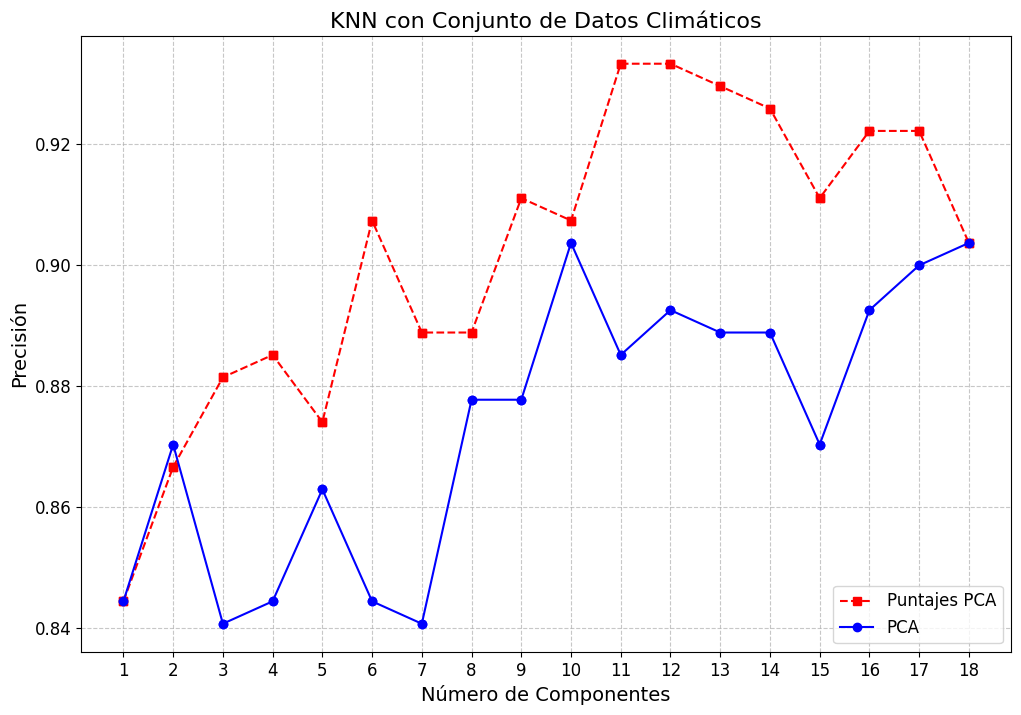

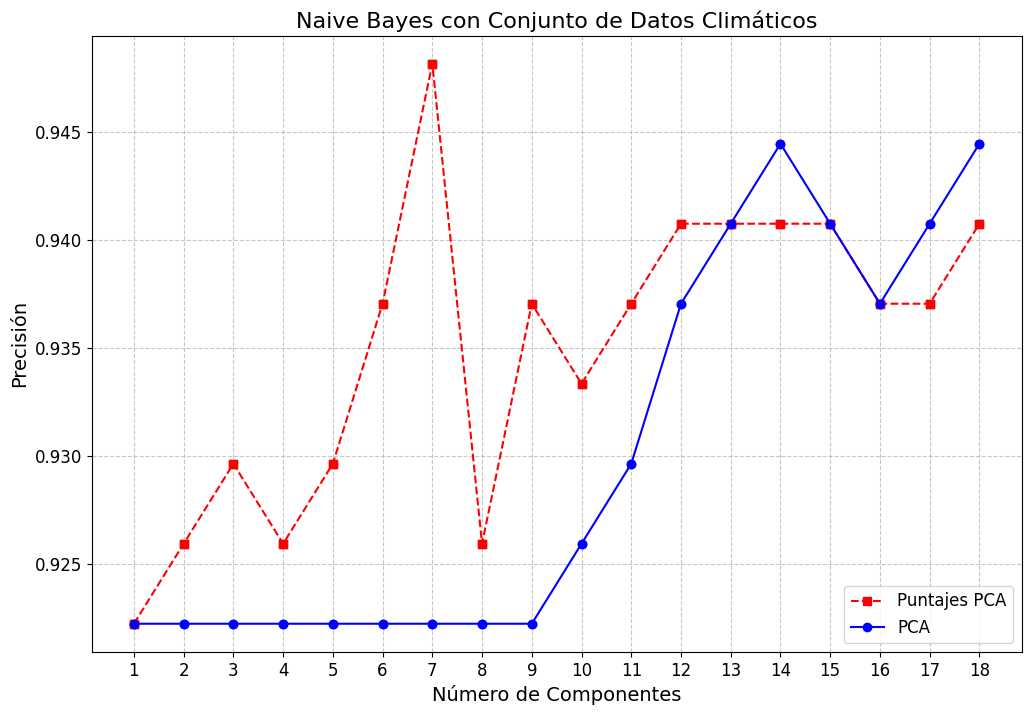

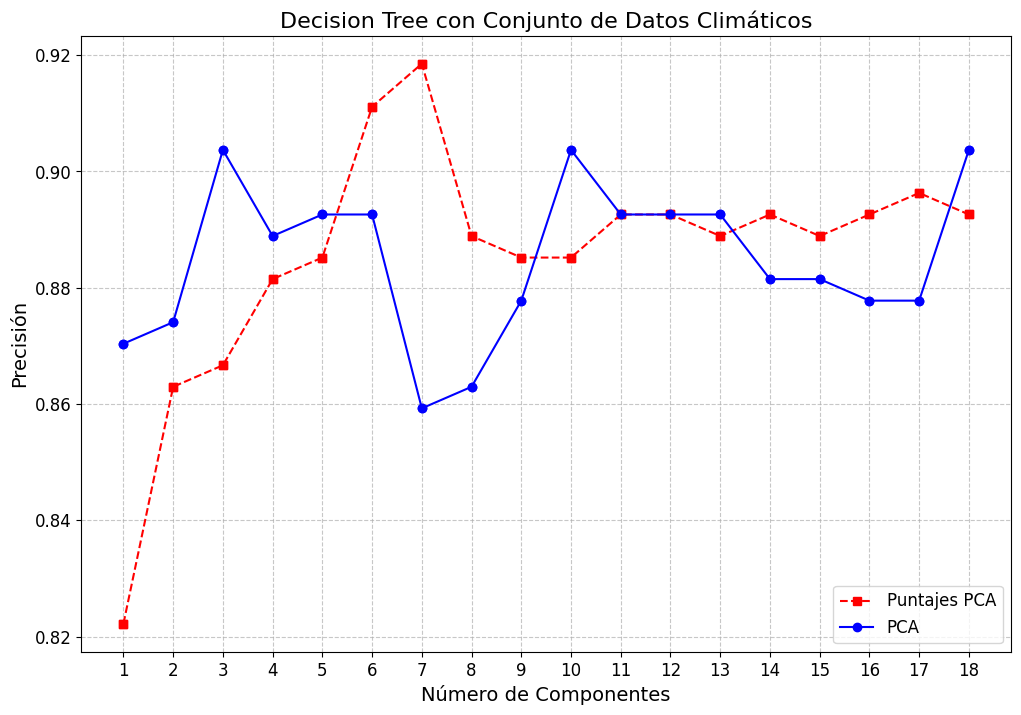

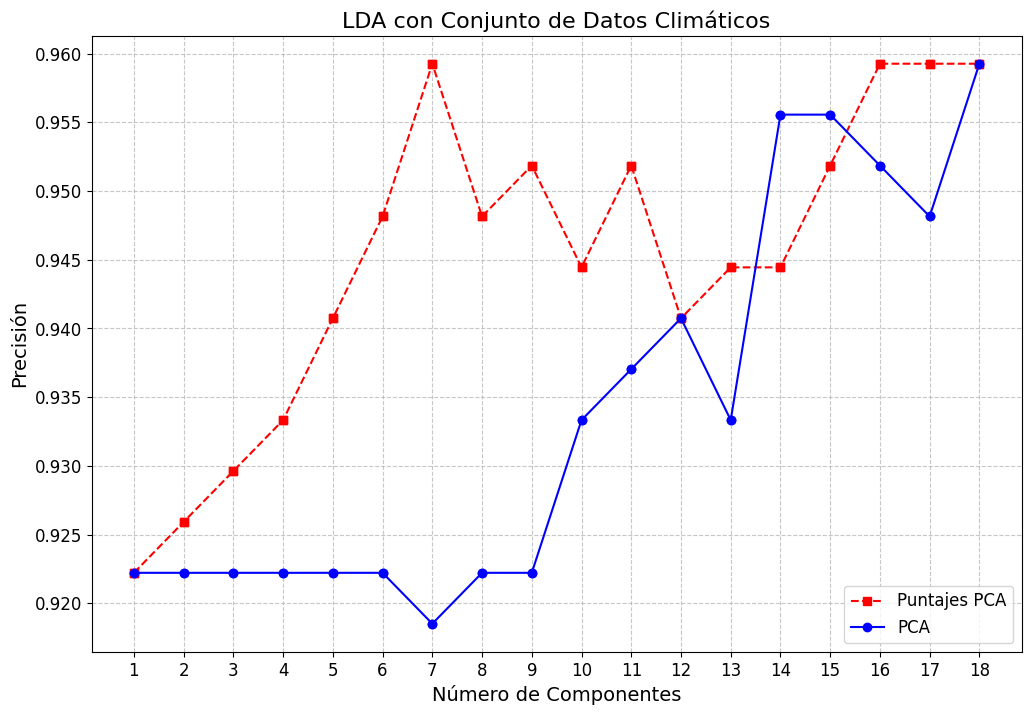

In [20]:
## Preprocesamiento de los datos

# Cargar los datos
# Inicializar una lista vacía para almacenar las líneas
lines = []

# Abrir el archivo
with open('/content/popfailures.dat', 'r') as file:
    # Leer cada línea
    for line in file:
        # Dividir la línea en campos y añadirla a la lista
        lines.append(line.split())

# Convertir la lista de líneas en un DataFrame
df_climate = pd.DataFrame(lines[1:], columns=lines[0])

## Seleccionar Características y Etiqueta
feature_names = df_climate.columns[2:-1]
X_feature = df_climate.iloc[:, 2:-1].values.astype(float)
y_target = df_climate.iloc[:, -1].values.astype(int)

# Centrar los datos
X_centered = center_data(X_feature)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_centered, y_target, test_size=0.5, random_state=0)

print('Tamaño de X_train:', X_train.shape, y_train.shape)

## Pipeline para el entrenamiento y evaluación de los modelos

# Definir los clasificadores a evaluar
classifiers = [
    ('KNN', KNeighborsClassifier(n_neighbors=1, metric='euclidean')),
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', min_samples_split=10)),
    ('LDA', LinearDiscriminantAnalysis())
]

# Definir el número de componentes a evaluar
n_components = range(1, len(feature_names) + 1)
dictionary_pca = {}
dictionary_pca_scores = {}

# Para cada clasificador
for classifier_name, classifier in classifiers:
    # Para cada número de componentes
    list_accuracy_pca = []
    list_accuracy_pca_scores = []
    for n in n_components:
        # -------Experimentos con PCA Scores-------
        # Crear un pipeline pca scores + clasificador
        objPca = PcaClass(X_train, y_train, n, feature_names)
        X_transformed = objPca.fit()
        X_test_projected = objPca.transform(X_test)

        classifier.fit(X_transformed, y_train)

        # Predecir las etiquetas del conjunto de prueba
        y_pred = classifier.predict(X_test_projected)

        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)
        list_accuracy_pca_scores.append(accuracy)

        # ------- Experimentos con PCA Tradicional -------
        # Crear un pipeline pca + clasificador
        pipe = Pipeline(steps=[('PCA', PCA(n_components=n)), (classifier_name, classifier)])

        # Entrenar el clasificador
        pipe.fit(X_train, y_train)

        # Predecir las etiquetas del conjunto de prueba
        y_pred = pipe.predict(X_test)

        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)
        list_accuracy_pca.append(accuracy)
        #print(f'Accuracy of {classifier_name} with {n} PCA components: {accuracy}')

    dictionary_pca[classifier_name] = list_accuracy_pca
    dictionary_pca_scores[classifier_name] = list_accuracy_pca_scores

# Ajuste de visualización y graficar los resultados
import matplotlib.pyplot as plt
import numpy as np

def plot_classification(array_accuracy_implementation, array_accuracy_sklearn, xlabel, ylabel, title, filename):
    """
    Esta función grafica los datos de clasificación para homeworks/8-homework_jmpc.

    Parámetros:
    - array_accuracy_implementation: lista de precisiones de la implementación de PCA.
    - array_accuracy_sklearn: lista de precisiones de PCA tradicional.
    - xlabel: string, etiqueta del eje X.
    - ylabel: string, etiqueta del eje Y.
    - title: string, título de la gráfica.
    - filename: string, nombre del archivo para guardar la gráfica.
    """
    feature_numbers = np.arange(1, len(array_accuracy_implementation) + 1)
    plt.figure(figsize=(12, 8))

    # Puntajes PCA
    plt.plot(feature_numbers, array_accuracy_implementation, color='red', label='Puntajes PCA', linestyle='dashed', marker='s')
    plt.scatter(feature_numbers, array_accuracy_implementation, color='red', marker='s')

    # PCA Tradicional
    plt.plot(feature_numbers, array_accuracy_sklearn, color='blue', label='PCA', linestyle='solid', marker='o')
    plt.scatter(feature_numbers, array_accuracy_sklearn, color='blue', marker='o')

    # Añadir etiquetas y título
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)

    # Mostrar la leyenda
    plt.legend(loc='lower right', fontsize=12)

    # Configurar las marcas del eje X
    plt.xticks(feature_numbers, fontsize=12)
    plt.yticks(fontsize=12)

    # Añadir cuadrícula
    plt.grid(True, linestyle='--', alpha=0.7)

    # Guardar la gráfica
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Mostrar la gráfica
    plt.show()

# Graficar los resultados
xlabel = 'Número de Componentes'
ylabel = 'Precisión'
for key, item in dictionary_pca.items():
    title = str(key) + ' con Conjunto de Datos Climáticos'
    filename = str(key) + '_climate.png'
    array_accuracy_sklearn = item
    array_accuracy_implementation = dictionary_pca_scores[key]
    plot_classification(array_accuracy_implementation, array_accuracy_sklearn, xlabel, ylabel, title, filename)


In [24]:
# Cargar los datos
path = '/content/data_banknote_authentication.txt'
df = pd.read_csv(path, delimiter=',', header=None)
print(df.head())

# Separar características y etiquetas
feature_names = df.columns[:-1]
X_feature = df.iloc[:, :-1].values
y_target = df.iloc[:, -1].values

# Centramos los datos según la media
X_centered = center_data(X_feature)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_centered, y_target, test_size=0.5, random_state=0)
print('X_train shape:', X_train.shape, y_train.shape)

         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0
X_train shape: (686, 4) (686,)


PCA con 1 componentes
PCA con 2 componentes
PCA con 3 componentes
PCA con 4 componentes


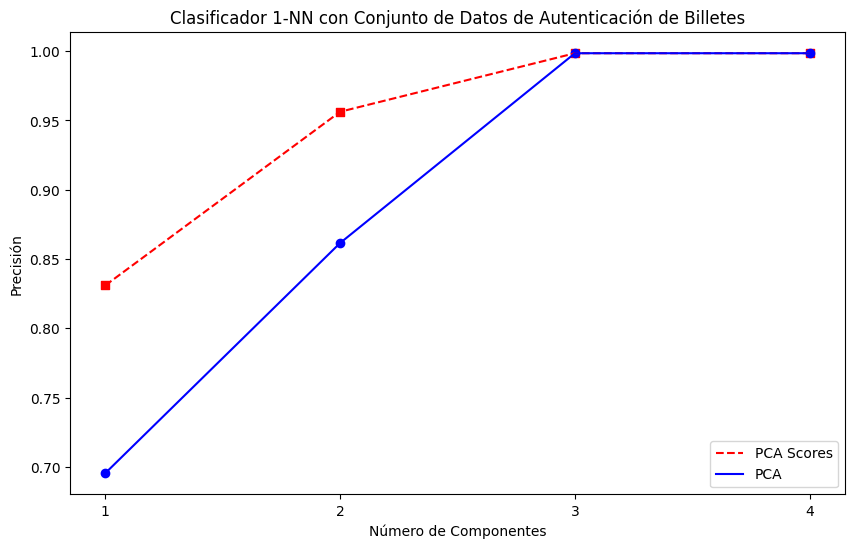

In [26]:
### Experimentos con Clasificadores

# 5.1 Clasificador 1-NN

# Reducción de dimensionalidad con Implementación de PCA
array_accuracy_implementation = []
array_accuracy_sklearn = []

for i in range(1, len(feature_names) + 1):
    print('PCA con', i, 'componentes')
    objPca = PcaClass(X_train, y_train, i, feature_names)
    X_train_projected = objPca.fit()
    X_test_projected = objPca.transform(X_test)

    # Experimento con 1-NN
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    knn.fit(X_train_projected, y_train)
    y_pred = knn.predict(X_test_projected)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_implementation.append(accuracy)

    # PCA tradicional
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_sklearn.append(accuracy)

# Configuración de la visualización
xlabel = 'Número de Componentes'
ylabel = 'Precisión'
title = 'Clasificador 1-NN con Conjunto de Datos de Autenticación de Billetes'
filename = '1NN.png'
plot_classfication(array_accuracy_implementation, array_accuracy_sklearn, xlabel, ylabel, title, filename)

Implementación PCA
PCA con 1 componentes
PCA con 2 componentes
PCA con 3 componentes
PCA con 4 componentes


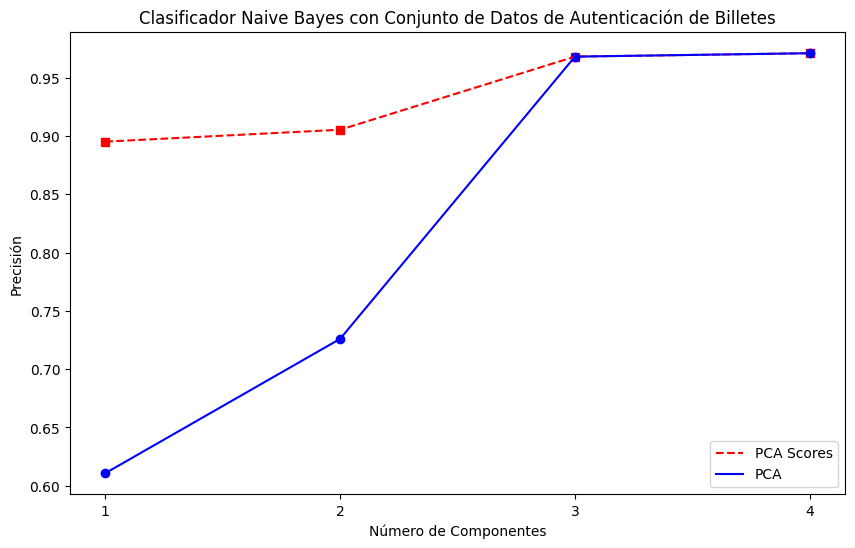

In [25]:
# 5.2 Clasificador Naive Bayes

# Reducción de dimensionalidad con Implementación de PCA
print('Implementación PCA')
array_accuracy_implementation = []
array_accuracy_sklearn = []

for i in range(1, len(feature_names) + 1):
    print('PCA con', i, 'componentes')
    objPca = PcaClass(X_train, y_train, i, feature_names)
    X_train_projected = objPca.fit()
    X_test_projected = objPca.transform(X_test)

    # Experimento con Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train_projected, y_train)
    y_pred = gnb.predict(X_test_projected)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_implementation.append(accuracy)

    # PCA tradicional
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    gnb.fit(X_train_pca, y_train)
    y_pred = gnb.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_sklearn.append(accuracy)

# Visualización
xlabel = 'Número de Componentes'
ylabel = 'Precisión'
title = 'Clasificador Naive Bayes con Conjunto de Datos de Autenticación de Billetes'
filename = 'naivebayes.png'
plot_classfication(array_accuracy_implementation, array_accuracy_sklearn, xlabel, ylabel, title, filename)

Implementación PCA
PCA con 1 componentes
PCA con 2 componentes
PCA con 3 componentes
PCA con 4 componentes


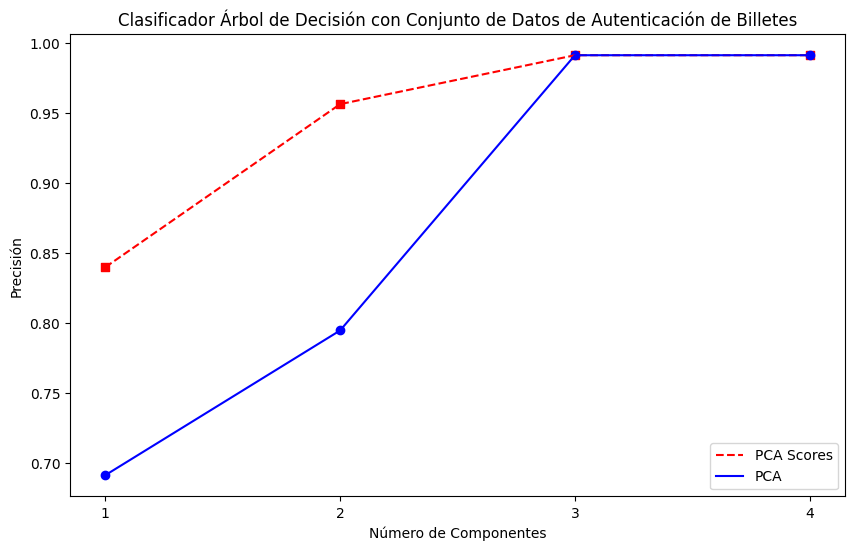

In [14]:
# 5.3 Clasificador Árbol de Decisión

# Reducción de dimensionalidad con Implementación de PCA
print('Implementación PCA')
array_accuracy_implementation = []
array_accuracy_sklearn = []

for i in range(1, len(feature_names) + 1):
    print('PCA con', i, 'componentes')
    objPca = PcaClass(X_train, y_train, i, feature_names)
    X_train_projected = objPca.fit()
    X_test_projected = objPca.transform(X_test)

    # Experimento con Árbol de Decisión
    clf = DecisionTreeClassifier(criterion='gini', min_samples_split=10)
    clf.fit(X_train_projected, y_train)
    y_pred = clf.predict(X_test_projected)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_implementation.append(accuracy)

    # PCA tradicional
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_sklearn.append(accuracy)

# Visualización
xlabel = 'Número de Componentes'
ylabel = 'Precisión'
title = 'Clasificador Árbol de Decisión con Conjunto de Datos de Autenticación de Billetes'
filename = 'decisiontree.png'
plot_classfication(array_accuracy_implementation, array_accuracy_sklearn, xlabel, ylabel, title, filename)

Implementación PCA
PCA con 1 componentes
PCA con 2 componentes
PCA con 3 componentes
PCA con 4 componentes


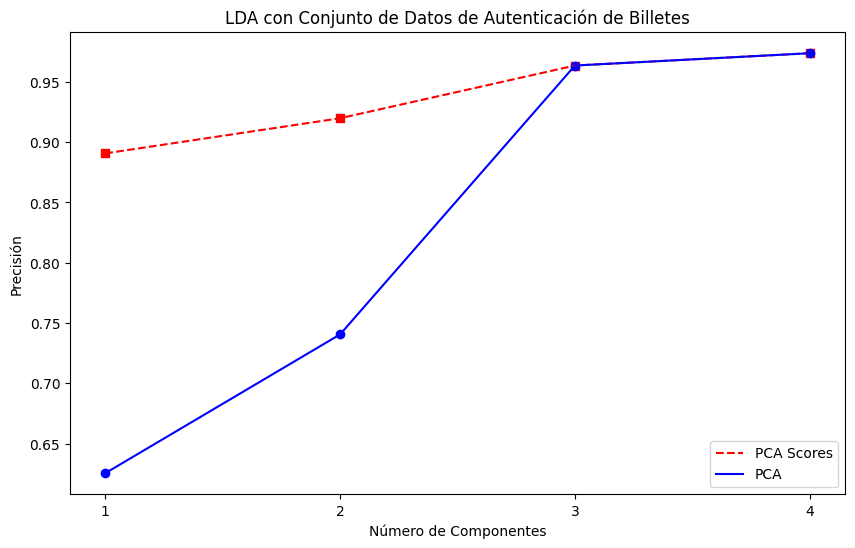

In [15]:
# 5.4 Clasificador LDA

# Reducción de dimensionalidad con Implementación de PCA
print('Implementación PCA')
array_accuracy_implementation = []
array_accuracy_sklearn = []

for i in range(1, len(feature_names) + 1):
    print('PCA con', i, 'componentes')
    objPca = PcaClass(X_train, y_train, i, feature_names)
    X_train_projected = objPca.fit()
    X_test_projected = objPca.transform(X_test)

    # Experimento con LDA
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train_projected, y_train)
    y_pred = clf.predict(X_test_projected)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_implementation.append(accuracy)

    # PCA tradicional
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    array_accuracy_sklearn.append(accuracy)

# Visualización
xlabel = 'Número de Componentes'
ylabel = 'Precisión'
title = 'LDA con Conjunto de Datos de Autenticación de Billetes'
filename = 'lda.png'
plot_classfication(array_accuracy_implementation, array_accuracy_sklearn, xlabel, ylabel, title, filename)